# Market Segmentation and Consumer Behavior

## Import Libraries and Datasets

Quick exploration on two extreme cases

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
pd.options.mode.chained_assignment = None

In [6]:
cc_df = pd.read_csv('Marketing_data.csv')
cc_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [7]:
cc_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Personal Note**

Explore some of the means and maxs of the the df and comment on some observations

**Personal Note**

Explore some of the extremes

**Large one off purchase**
- The extreme with the larget one off purchase (probably a car)
- Make a lot purchases (some large), but avoid cash advance. Perhaps an individual with money and sensitive to interest rate?
- Make 101 purchases
- Min payment is 46000
- Cash advance frequency is 0.08 (very little compare to the guy below)

In [8]:
cc_df[cc_df['ONEOFF_PURCHASES'] == cc_df['ONEOFF_PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


**Large Cash Advance withdrawl**

- Guy likes cash advance options
- Frequency is a lot
- 123 chas advance transactions

In [9]:
cc_df[cc_df.CASH_ADVANCE == cc_df.CASH_ADVANCE.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualize and Explore df

**Missing Values**

<AxesSubplot:>

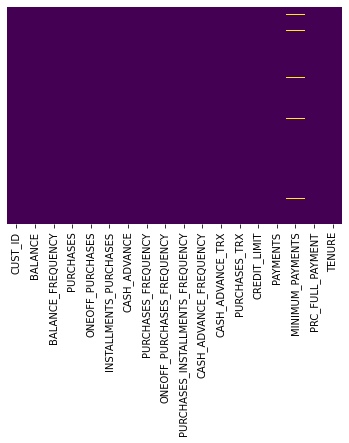

In [10]:
plt.rc('figure', figsize = (10, 8))
sns.heatmap(cc_df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [11]:
cc_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
print(round(cc_df.MINIMUM_PAYMENTS.isnull().sum() / cc_df.shape[0] * 100, 4), "%")

3.4972 %


**Fill in Missing Values for Credit Limit**

Since the "CREDIT_LIMIT" is only missing 1 value, we can fill it in with the mean of the entire column.

In [13]:
cc_df.CREDIT_LIMIT.fillna(value = cc_df.CREDIT_LIMIT.mean(), inplace=True)

**Fill in Missing Values for Min Payment**

Since the "MINIMUM_PAYMENTS" is only missing 3.497%, we can fill it in with the mean of the entire column

In [14]:
cc_df.loc[cc_df.MINIMUM_PAYMENTS.isnull() == True, 'MINIMUM_PAYMENTS'] = cc_df.MINIMUM_PAYMENTS.mean()

In [15]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

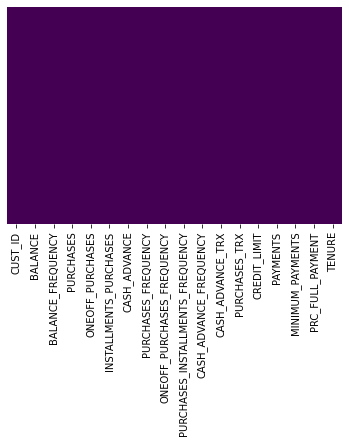

In [16]:
sns.heatmap(cc_df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

**Drop Data**

In [17]:
cc_df.drop('CUST_ID', axis = 1, inplace=True)

In [18]:
cc_df.shape

(8950, 17)

**DISPLOT**

        sns.distplot()

Displot combines matplotlib.hist with seaborn kdeplot()
- kde = kernal density estimate
- kde: used for visualizing the probability density of a continuous variable
    - Demonstrates the probability density at different values in a continuous variable

In [19]:
len(cc_df.columns)

17

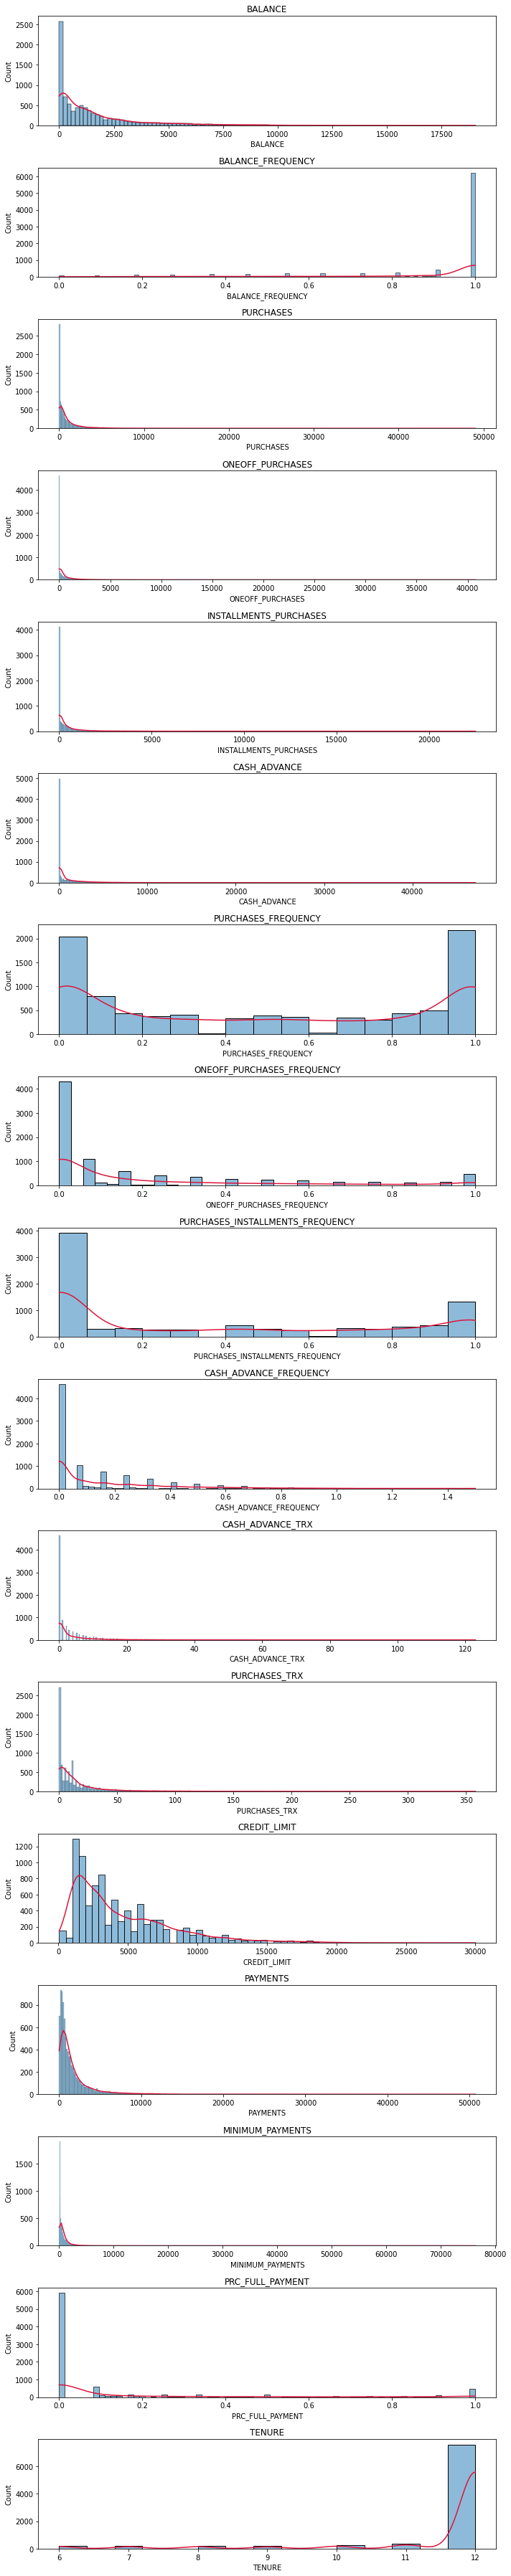

In [20]:
#kde_kws={'color':'b', 'lw':3, 'label':'KDE'}
plt.figure(figsize=(10, 50))
for i in range(17):
    plt.subplot(17, 1, i+1)
    ax = sns.histplot(cc_df[cc_df.columns[i]], kde=True)
    plt.title(cc_df.columns[i])
    ax.lines[0].set_color('crimson')

plt.tight_layout()

Comment on purchase-frequency

Comment on PRC_FULL_PAYMENT

**Correlation**

<AxesSubplot:>

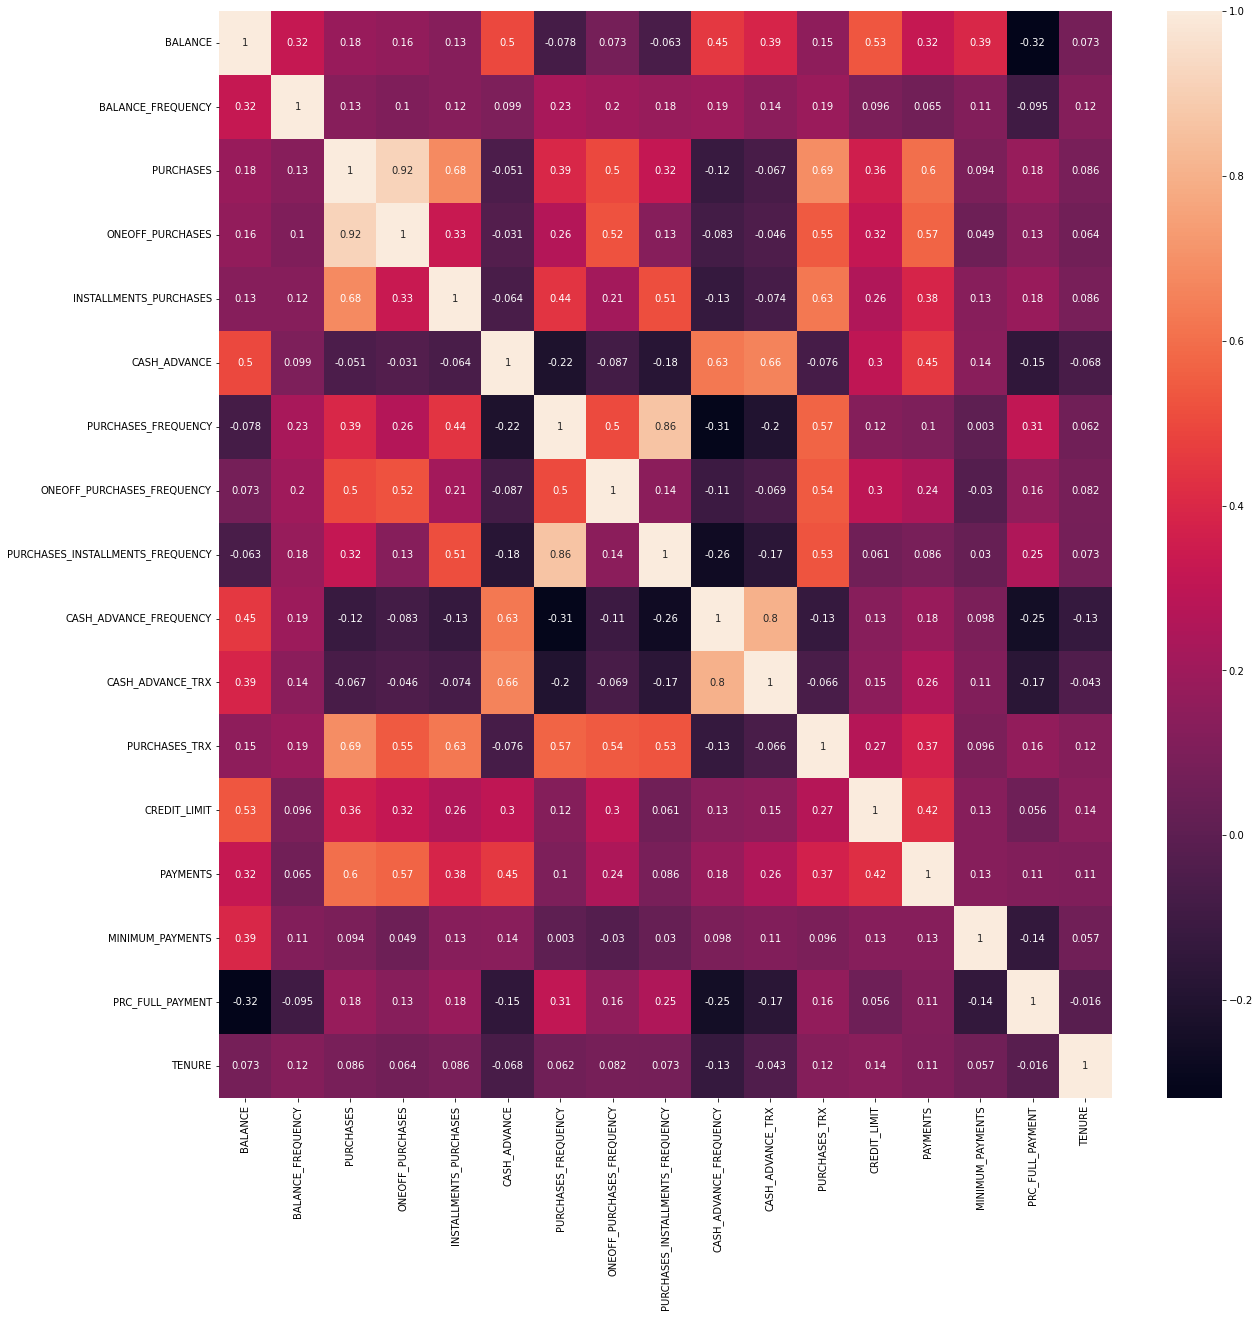

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(cc_df.corr(), annot=True)

## The Elbow Method

Determining the optiminal num of K clusters using the elbow method

**scale the data**

In [22]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cc_df)

In [23]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

**elbow method**

In [24]:
scores = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    scores.append(kmeans.inertia_)

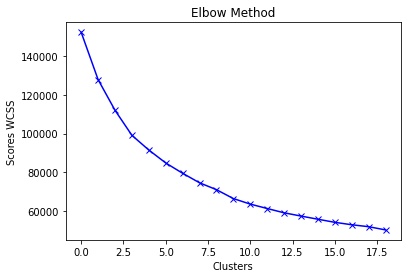

In [25]:
plt.plot(scores, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

we will use K = 8

## Apply KMeans Clustering

Unsupervised

In [26]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [27]:
labels

array([0, 3, 6, ..., 5, 5, 5], dtype=int32)

In [28]:
kmeans.cluster_centers_.shape

(8, 17)

In [29]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[cc_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.019675,0.403182,-0.361548,-0.246767,-0.401408,-0.088738,-0.867453,-0.410283,-0.758785,0.112433,-0.021868,-0.486597,-0.303803,-0.249376,-0.003643,-0.456956,0.271977
1,0.930005,0.467293,2.250289,1.707075,2.184612,-0.191383,1.160280,1.549471,1.257353,-0.306841,-0.207888,2.792254,1.232050,1.281411,0.572226,0.270314,0.333865
2,-0.362243,0.334614,-0.036370,-0.241467,0.357431,-0.362495,0.989707,-0.379290,1.203795,-0.470870,-0.357655,0.189132,-0.257778,-0.215624,-0.045694,0.309575,0.257459
3,1.690440,0.392599,-0.215719,-0.154240,-0.226766,2.028353,-0.473579,-0.207596,-0.410927,1.927060,1.941688,-0.263279,1.033392,0.827635,0.513104,-0.390593,0.070615
4,-0.701368,-2.145072,-0.312447,-0.237526,-0.302285,-0.321782,-0.556727,-0.445738,-0.439325,-0.520713,-0.376018,-0.419883,-0.177196,-0.203414,-0.256627,0.280785,0.199062
5,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
6,-0.173042,0.390210,0.472456,0.620938,-0.023798,-0.339372,0.944211,1.893838,0.075056,-0.418871,-0.333433,0.528702,0.378638,0.098023,-0.165524,0.428344,0.262647
7,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


In order to understand what these numbers mean, let's perform inverse transformation

In [30]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [cc_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1605.425806,0.972781,230.752231,182.854340,48.079765,792.782461,0.142200,0.080062,0.062877,0.157643,3.099596,2.614847,3389.091020,1011.224791,855.715926,0.020063,11.881294
1,3500.201434,0.987968,5810.981818,3425.831986,2386.585239,577.531077,0.956027,0.664695,0.864141,0.073742,1.830144,84.114833,8977.153110,5442.702336,2197.755933,0.232777,11.964115
2,810.496156,0.956538,925.499112,191.651761,734.288041,218.701769,0.887568,0.089308,0.842856,0.040918,0.808091,19.410952,3556.546720,1108.933618,757.717642,0.244260,11.861865
3,5082.982745,0.970274,542.317625,336.429826,206.005608,5232.422341,0.300280,0.140528,0.201125,0.520769,16.499421,8.165701,8254.350574,4129.067025,2059.974358,0.039473,11.611819
4,104.637027,0.369123,335.656938,198.193215,137.715462,304.079507,0.266909,0.069485,0.189838,0.030944,0.682782,4.273113,3849.736594,1144.281146,266.148080,0.235839,11.783715
5,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
6,1204.303501,0.969708,2012.614239,1623.066615,389.547624,267.191700,0.869308,0.767426,0.394267,0.051324,0.973394,27.851376,5872.089241,2016.911454,478.458914,0.278998,11.868807
7,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333


- First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance (104) and cash advance (303), Percentage of full payment = 23%
- Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance (5000) and cash advance (~5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
- Third customer cluster (VIP/Prime): high credit limit 16K and highest percentage of full payment, target for increase credit limit and increase spending habits
- Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

In [31]:
labels.shape

(8950,)

In [32]:
print('clusters range from ', labels.min(), 'to ', labels.max())

clusters range from  0 to  7


We will now add a column and assign the cluster associated with that individual.

We will concatinate our original df with the lables

In [33]:
#create a df that includes the clusters
clusters = pd.DataFrame({'clusters':labels})

#concat the new df with our original df
cluster_df = pd.concat([cc_df, clusters], axis = 1)

In [34]:
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,5
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,5
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,5
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,5


## Principal Component Analysis (PCA)

**Obtaining the actual PCA**

In [35]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled) #fit the scaled df to the instanciated PCA

**Create a df to visualize**

We'll create a df with with the principal_comp so that we can concat to the original df and visualize

In [36]:
pca_df = pd.DataFrame(principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076443
1,-1.138297,2.506474
2,0.969684,-0.383593
3,-0.873628,0.043195
4,-1.599434,-0.688582


**Concat the pca df to the label cluster**

In [37]:
#Make a df from the lables
labels = pd.DataFrame({'cluster':labels})

#concat
pca_df = pd.concat([pca_df, labels], axis = 1)

pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076443,0
1,-1.138297,2.506474,3
2,0.969684,-0.383593,6
3,-0.873628,0.043195,0
4,-1.599434,-0.688582,0


**Visualization**

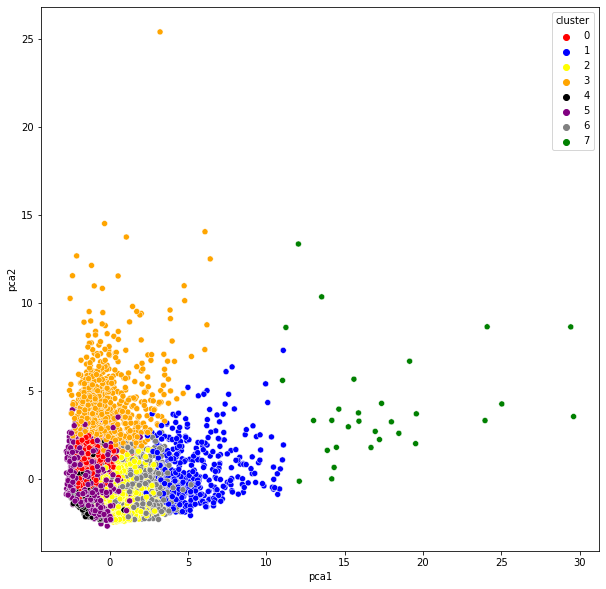

In [38]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data = pca_df, x = 'pca1', y = 'pca2', hue = 'cluster', palette = ['red', 'blue', 'yellow', 'orange', 'black', 'purple', 'gray', 'green'])

## Deep Learning
### Applying Autoencoders to perform dimensionality reduction

There is some correlation in the data so autoencoders might be appropriate

**Import Libraries**

In [39]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

In [40]:
# since the df has 17 features
input_df = Input(shape = (17,))

#encoder
#fully connected artificial neural network
x = Dense(7, activation = 'relu')(input_df) #Layer 1
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

#encoded layer
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

#decorder network
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

#autoencoder
autoencoder = Model(input_df, decoded)

#encoder
encoder = Model(input_df, encoded)

#complie
autoencoder.compile(optimizer='adam', loss = 'mean_squared_error')

2022-08-08 15:59:14.765934: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-08 15:59:14.768162: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [41]:
df_scaled.shape

(8950, 17)

**Train the model with the scaled data**

In [42]:
autoencoder.fit(df_scaled, df_scaled, batch_size=128, epochs=25, verbose=1)

Train on 8950 samples
Epoch 1/25
8950/8950 [==============================] - 4s 469us/sample - loss: 0.4776
Epoch 2/25
8950/8950 [==============================] - 3s 348us/sample - loss: 0.2597
Epoch 3/25
8950/8950 [==============================] - 3s 345us/sample - loss: 0.2119
Epoch 4/25
8950/8950 [==============================] - 3s 345us/sample - loss: 0.1683
Epoch 5/25
8950/8950 [==============================] - 3s 345us/sample - loss: 0.1514
Epoch 6/25
8950/8950 [==============================] - 3s 345us/sample - loss: 0.1234
Epoch 7/25
8950/8950 [==============================] - 3s 346us/sample - loss: 0.1143
Epoch 8/25
8950/8950 [==============================] - 3s 346us/sample - loss: 0.1109
Epoch 9/25
8950/8950 [==============================] - 3s 353us/sample - loss: 0.1018
Epoch 10/25
8950/8950 [==============================] - 3s 347us/sample - loss: 0.0907
Epoch 11/25
8950/8950 [==============================] - 3s 343us/sample - loss: 0.0932
Epoch 12/25
8950/89